<a href="https://colab.research.google.com/github/cheung0/Predicting-Air-Quality/blob/main/Copy_of_Copy_of_AQI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

In [14]:
import csv
from datetime import datetime

# Read the CSV file and get the column with the date
with open('/Bay Area Air Quality.csv') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip the header row
    date_col_index = header.index('Date')
    rows = list(reader)

# Convert the date into a day of the week and add it as a new column
for row in rows:
    date_str = row[date_col_index]
    date_obj = datetime.strptime(date_str, '%m/%d/%Y')  # Parse the date string
    day_of_week = date_obj.strftime('%A')  # Get the day of the week
    row.append(day_of_week)

# Write the updated CSV file
with open('/output.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header + ['DAY_OF_WEEK'])  # Add the new column to the header row
    writer.writerows(rows)


In [15]:
import pandas as pd
from google.colab import files
#uploaded = files.upload()
df = pd.read_csv('/output.csv')

# get statistics of csv file
df.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,1.678000e+03,1678.0,1678.000000,1678.000000,1678.0,1678.0,1678.0,1678.000000,1678.0,1678.000000,1678.000000,1678.000000
mean,6.040419e+07,3.0,5.566925,23.058403,1.0,100.0,88101.0,41925.244338,6.0,40.405244,37.719772,-122.149726
std,3.901345e+05,0.0,3.068820,12.087543,0.0,0.0,0.0,343.538924,0.0,39.012638,0.326296,0.316856
min,6.001001e+07,3.0,-0.500000,0.000000,1.0,100.0,88101.0,41860.000000,6.0,1.000000,36.999571,-122.818294
25%,6.001001e+07,3.0,3.500000,15.000000,1.0,100.0,88101.0,41860.000000,6.0,1.000000,37.482934,-122.356811
50%,6.013100e+07,3.0,4.900000,20.000000,1.0,100.0,88101.0,41860.000000,6.0,13.000000,37.765946,-122.203370
75%,6.085000e+07,3.0,7.000000,29.000000,1.0,100.0,88101.0,41940.000000,6.0,85.000000,37.936013,-121.894898
max,6.097000e+07,3.0,26.100000,80.000000,1.0,100.0,88101.0,46700.000000,6.0,97.000000,38.403765,-121.574684


In [16]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
# List of specific days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Iterate over each day and calculate the AQI statistics
for day in days_of_week:
    # Filter the data for the specific day
    day_data = df[df['DAY_OF_WEEK'] == day]
    
    # Calculate the AQI statistics for the specific day
    aqi_stats = day_data['DAILY_AQI_VALUE'].agg(['min', 'max', 'mean', 'median', 'std'])
    
    # Print the AQI statistics for the specific day
    print("AQI statistics for", day)
    print(aqi_stats)
    print()

AQI statistics for Monday
min        0.000000
max       66.000000
mean      22.152263
median    19.000000
std       12.163719
Name: DAILY_AQI_VALUE, dtype: float64

AQI statistics for Tuesday
min        0.000000
max       54.000000
mean      21.289256
median    20.000000
std       10.722790
Name: DAILY_AQI_VALUE, dtype: float64

AQI statistics for Wednesday
min        0.000000
max       59.000000
mean      22.134694
median    19.000000
std       12.643043
Name: DAILY_AQI_VALUE, dtype: float64

AQI statistics for Thursday
min        0.000000
max       73.000000
mean      25.862500
median    23.000000
std       13.581378
Name: DAILY_AQI_VALUE, dtype: float64

AQI statistics for Friday
min        0.000000
max       64.000000
mean      25.311966
median    24.000000
std       11.304643
Name: DAILY_AQI_VALUE, dtype: float64

AQI statistics for Saturday
min        0.000000
max       63.000000
mean      23.864407
median    21.000000
std       11.776945
Name: DAILY_AQI_VALUE, dtype: float64

AQ

Average AQI for weekends is around 23 and average AQI for weekdays is 23.6. 

In [18]:
df = pd.get_dummies(df, columns=['DAY_OF_WEEK'])

In [19]:
df = df.drop(["Date","Source","Site ID","POC","UNITS","Site Name","DAILY_OBS_COUNT","PERCENT_COMPLETE","AQS_PARAMETER_CODE","AQS_PARAMETER_DESC","CBSA_CODE","CBSA_NAME","STATE_CODE","STATE","COUNTY_CODE","COUNTY","SITE_LATITUDE","SITE_LONGITUDE"
], axis=1)


In [20]:
df

,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,6.4,27,0,0,0,1,0,0,0
1,6.7,28,0,1,0,0,0,0,0
2,5.6,23,0,0,0,0,0,1,0
3,3.1,13,0,0,0,0,0,0,1
4,6.4,27,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1673,1.4,6,0,0,0,0,0,1,0
1674,3.2,13,0,0,0,0,0,0,1
1675,3.0,13,0,0,0,0,1,0,0
1676,2.2,9,1,0,0,0,0,0,0


In [ ]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
# Split the training set into features (X_train) and target variable (y_train)
X_train = df_train.drop(columns=["DAILY_AQI_VALUE"])  # Remove the target variable column
y_train = df_train["DAILY_AQI_VALUE"]  # Select the target variable column

# Split the test set into features (X_test) and target variable (y_test)
X_test = df_test.drop(columns=["DAILY_AQI_VALUE"])  # Remove the target variable column
y_test = df_test["DAILY_AQI_VALUE"]  # Select the target variable column


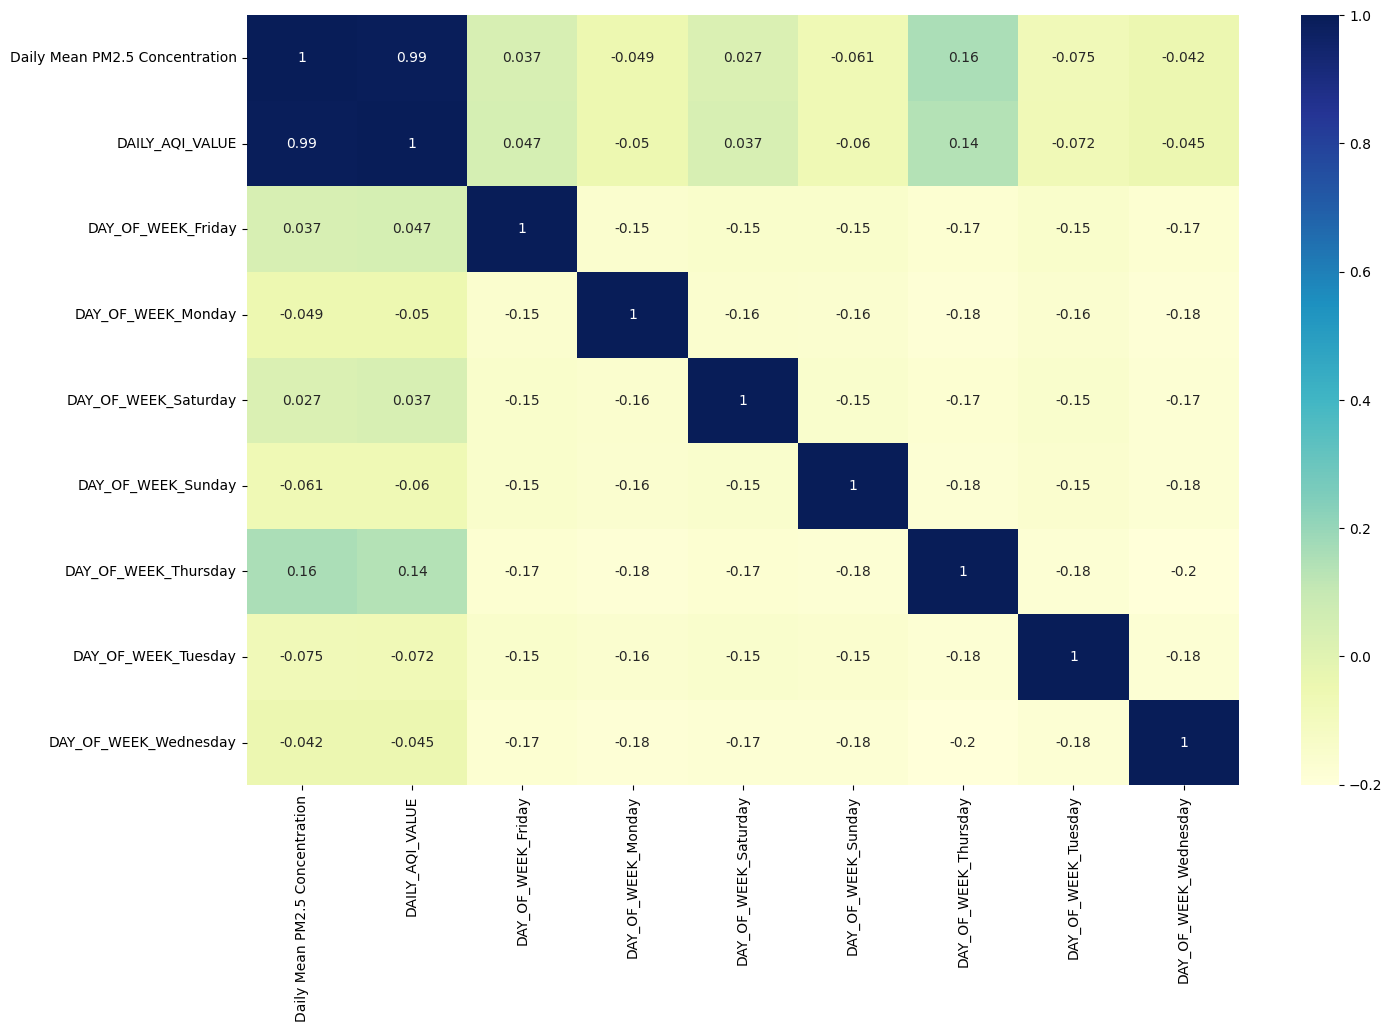

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
y_train = df_train.pop('DAILY_AQI_VALUE')
X_train = df_train

In [ ]:
y_train

425    0.180556
579    0.222222
173    0.222222
277    0.625000
378    0.388889
         ...   
578    0.250000
53     0.083333
350    0.402778
79     0.194444
520    0.472222
Name: DAILY_AQI_VALUE, Length: 495, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_true represents the actual target values
y_true = y_train

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.00034365174019703896
Root Mean Squared Error (RMSE): 0.018537846158522272
Mean Absolute Error (MAE): 0.010607827954019362
R-squared (R2) Score: 0.9881585383753545


In [ ]:
# Assuming X_test represents the feature matrix of the test set
# Assuming y_test represents the actual target values of the test set

# Calculate predictions on the test set
y_pred_test = lm.predict(X_test)

# Calculate evaluation metrics on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Test Set Evaluation:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R2) Score:", r2_test)


Test Set Evaluation:
Mean Squared Error (MSE): 0.011075865223133263
Root Mean Squared Error (RMSE): 0.10524193661812416
Mean Absolute Error (MAE): 0.09757314219948314
R-squared (R2) Score: 0.7488706228513711


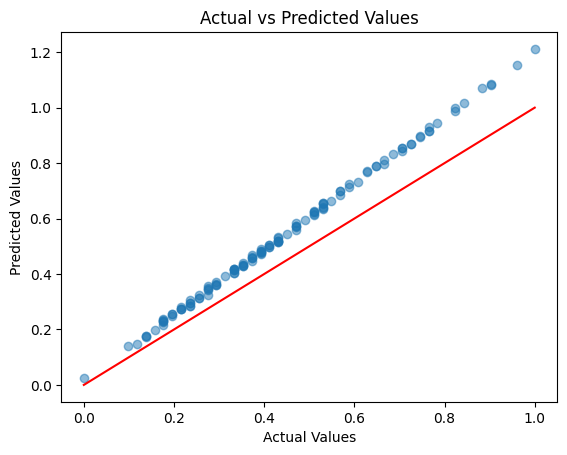

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test represents the actual target values of the test set
# Assuming y_pred_test represents the predicted values on the test set

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test, alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Display the plot
plt.show()


In [ ]:
# One hot encode day of week and normalize daily aqi value and daily mean pm2.5 concentration

# Encode the day of the week using one-hot encoding
day_of_week = pd.get_dummies(df['Day of Week'])

# Extract the features (inputs) and targets (outputs) from the DataFrame
normalize_features = df[["DAILY_AQI_VALUE", "Daily Mean PM2.5 Concentration"]]
targets = df["DAILY_AQI_VALUE"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Normalize the data
scaler = StandardScaler()
normalize_features = scaler.fit_transform(normalize_features)

# put day of week in a new df features 
# concatenate the normalized features and day of the week along the columns axis
features = np.concatenate((normalize_features, day_of_week), axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# X is your input feature matrix as a numpy array
# y is your target variable as a numpy array
# test_size is the proportion of the data to use for testing
# random_state is a seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# X is your input feature matrix as a numpy array
# y is your target variable as a numpy array
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import numpy as np

# Assuming normalized feature matrix is called 'normalized_features'
day_of_week_cols = normalized_features[:, :7] # Select the one-hot encoded day of week columns
day_of_week_sample = day_of_week_cols[0].reshape(1, -1) # Reshape to have only one sample

# Assuming your trained model is called 'model'
predicted_aqi = model.predict(day_of_week_sample)

# If you want to convert the predicted normalized AQI value back to its original scale
predicted_aqi = (predicted_aqi + 1) / 2 * (max_aqi - min_aqi) + min_aqi



NameError: ignored

In [ ]:
# X_new is your new input feature matrix
predictions = model.predict(sample)
print(predictions)

[1.37076298e-15]


In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, activation='relu', input_shape=[7]),
    tf.keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1)
])


In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
# Train the model
history = model.fit(train_features, train_labels, epochs=150)

Epoch 1/150
16/16 [==============================] - 1s 2ms/step - loss: 1.0762
Epoch 2/150
16/16 [==============================] - 0s 2ms/step - loss: 1.0243
Epoch 3/150
16/16 [==============================] - 0s 3ms/step - loss: 1.0191
Epoch 4/150
16/16 [==============================] - 0s 3ms/step - loss: 1.0196
Epoch 5/150
16/16 [==============================] - 0s 3ms/step - loss: 1.0106
Epoch 6/150
16/16 [==============================] - 0s 3ms/step - loss: 1.0100
Epoch 7/150
16/16 [==============================] - 0s 3ms/step - loss: 1.0139
Epoch 8/150
16/16 [==============================] - 0s 3ms/step - loss: 1.0170
Epoch 9/150
16/16 [==============================] - 0s 3ms/step - loss: 1.0309
Epoch 10/150
16/16 [==============================] - 0s 3ms/step - loss: 1.0165
Epoch 11/150
16/16 [==============================] - 0s 2ms/step - loss: 1.0119
Epoch 12/150
16/16 [==============================] - 0s 3ms/step - loss: 1.0165
Epoch 13/150
16/16 [=================

In [ ]:
# Evaluate the model on the testing set
mse = model.evaluate(test_features, test_labels)
print('Mean Squared Error:', mse)

4/4 [==============================] - 0s 6ms/step - loss: 0.9529
Mean Squared Error: 0.9529088139533997


In [ ]:
# normalize the inputs
normalize_features = scaler.transform(X)

# make predictions
y_pred = model.predict(normalize_features)

# convert predictions back to original scale
y_pred_unscaled = scaler.inverse_transform(y_pred)


ValueError: ignored

In [ ]:
# Use the model to make predictions on new data
new_data = pd.DataFrame({
    'Monday': [0],
    'Tuesday': [0],
    'Wednesday': [0],
    'Thursday': [0],
    'Friday': [0],
    'Saturday': [0],
    'Sunday': [0]
})

In [ ]:
new_data1 = new_data.copy()
new_data1['Monday'] = [1]

new_data2 = new_data.copy()
new_data2['Tuesday'] = [1]

new_data3 = new_data.copy()
new_data3['Wednesday'] = [1]

new_data4 = new_data.copy()
new_data4['Thursday'] = [1]

new_data5 = new_data.copy()
new_data5['Friday'] = [1]

new_data6 = new_data.copy()
new_data6['Saturday'] = [1]

new_data7 = new_data.copy()
new_data7['Sunday'] = [1]

In [ ]:
prediction1 = model.predict(new_data1)

prediction2 = model.predict(new_data2)

prediction3 = model.predict(new_data3)

prediction4 = model.predict(new_data4)

prediction5 = model.predict(new_data5)

prediction6 = model.predict(new_data6)

prediction7 = model.predict(new_data7)


print('AQI Prediction Monday:', prediction1)

print('AQI Prediction Tuesday:', prediction2[0][0])

print('AQI Prediction Wednesday:', prediction3[0][0])

print('AQI Prediction Thursday:', prediction4)

print('AQI Prediction Friday:', prediction5)

print('AQI Prediction Saturday:', prediction6)

print('AQI Prediction Sunday:', prediction7)

1/1 [==============================] - 0s 28ms/step
AQI Prediction Monday: [[0.03011695]]
AQI Prediction Tuesday: 0.03011695
AQI Prediction Wednesday: 0.03011695
AQI Prediction Thursday: [[0.03011695]]
AQI Prediction Friday: [[0.03011695]]
AQI Prediction Saturday: [[0.03011695]]
AQI Prediction Sunday: [[0.03011695]]
